In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from trendspy import Trends, BatchPeriod

# 1. "[Explore](https://trends.google.com/trends/explore)" Trends

This module provides access to Google Trends data through several key functions. Each function helps analyze different aspects of search trends and user interests.

## 1.1 Interest Over Time

<Axes: title={'center': 'Worldwide Trends'}, xlabel='time [UTC]'>

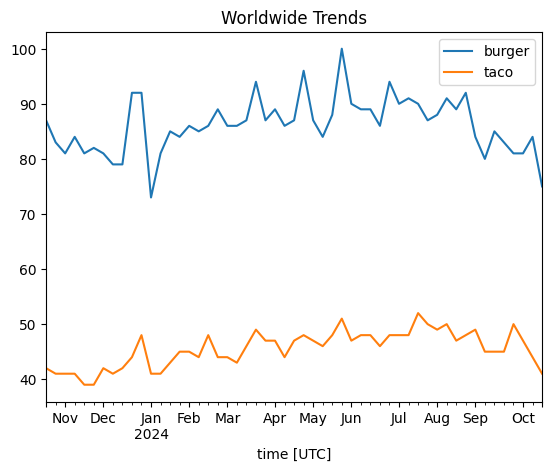

In [2]:
# Initialize the API client
tr = Trends()

# 1. Define search keywords
keywords = ['burger', 'taco']

# 2. Get interest over time (default: worldwide)
df = tr.interest_over_time(keywords)
df.iloc[:,:len(keywords)].plot(title='Worldwide Trends')

[{'name': 'Detroit MI', 'id': 'US-MI-505'}]


<Axes: title={'center': 'Trends in Detroit [Last Year]'}, xlabel='time [UTC]'>

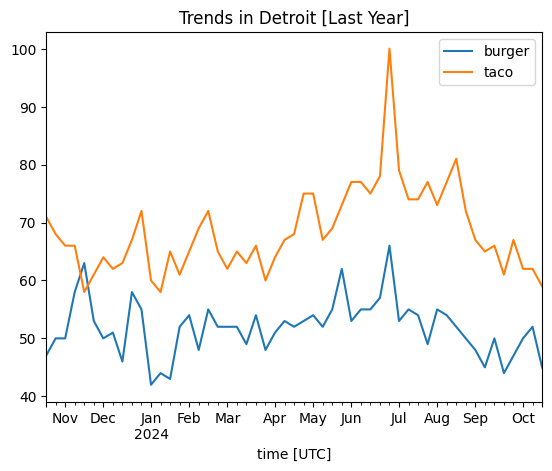

In [3]:
# 3. Search for specific locations
locations = tr.geo('detroit')
print(locations)
# Output example:
# [{'name': 'Detroit MI', 'id': 'US-MI-505'}]

# 4. Get trends for specific location
detroit_id = 'US-MI-505'  # ID from the geo search
df_detroit = tr.interest_over_time(keywords, geo=detroit_id)

# Compare trends
df_detroit.iloc[:,:len(keywords)].plot(title='Trends in Detroit [Last Year]')

## 1.2 Multirange Interest Over Time

This functionality allows you to analyze interest trends across different timeframes and regions simultaneously.

### Multirange Restrictions:

1. **Same Resolution**
   All timeframes must share the same data granularity. The system automatically determines the resolution based on the requested timeframe length:

   | Timeframe Length (delta) | Resolution |
   |-------------------------|------------|
   | < 5 hours | 1 minute |
   | 5 - 36 hours | 8 minutes |
   | 36 - 72 hours | 16 minutes |
   | 72 hours - 8 days | 1 hour |
   | 8 - 270 days | 1 day |
   | 270 - 1900 days | 1 week |
   | ≥ 1900 days | 1 month |

2. **Timeframe Length Ratio**
   The maximum timeframe must not exceed twice the length of the minimum timeframe. This restriction ensures data comparability.

,python | US | 2024-01-13 2024-01-25,isPartial_0,index_0,javascript | GB-SCT | 2024-05-28 2024-06-20,isPartial_1,index_1
0,43.0,False,2024-01-13,0,False,2024-05-28
1,44.0,False,2024-01-14,20,False,2024-05-29
2,53.0,False,2024-01-15,9,False,2024-05-30
3,73.0,False,2024-01-16,0,False,2024-05-31
4,90.0,False,2024-01-17,0,False,2024-06-01


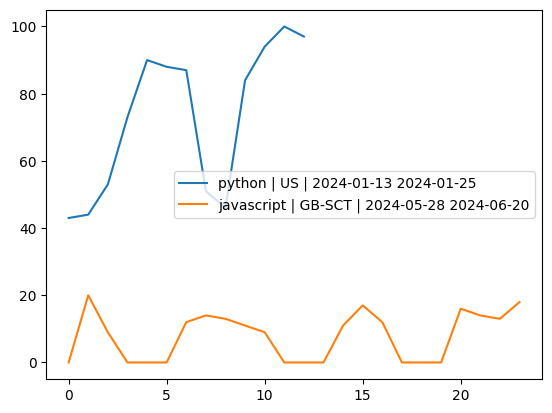

In [4]:
# Correct example - comparable timeframes
keywords = ['python', 'javascript']
timeframes = [
    '2024-01-25 12-d',  # 12-day period
    '2024-06-20 23-d'   # 23-day period (less than 12 * 2)
]
geo = ['US', 'GB-SCT']  # United States and Scotland

df = tr.interest_over_time(keywords, timeframe=timeframes, geo=geo)
df.iloc[:,::3].plot()
display(df.head())

# Invalid example - will raise an error
invalid_timeframes = [
    '2024-01-25 10-d',
    '2024-06-20 30-d'  # 30 days > 10 * 2 days
]

Let me help improve the documentation for the Interest by Region section to make it clearer and more comprehensive.

## 1.3 Interest by Region

This functionality enables geographical analysis of search interest at different levels of detail - from countries down to specific cities.

### Resolution Options:
- **'COUNTRY'**: Country-level data (default when `geo` is not specified)
- **'REGION'**: State/province level data within a country
- **'CITY'**: City-level data within a region
- **'DMA'**: Designated Market Areas (primarily for U.S. media markets)

### Geographic Hierarchy:
```
COUNTRY (e.g., 'US')
  └── REGION (e.g., 'US-NV' for Nevada)
       └── CITY (e.g., 'US-NV-839' for Las Vegas)
```

### Usage Examples:

1. **Global Country-Level Analysis**

In [5]:
# Get interest data for all countries
df = tr.interest_by_region(keywords)
df.head()

,geoName,geoCode,python,javascript
0,China,CN,94,6
1,Singapore,SG,86,14
2,Israel,IL,88,12
3,Hong Kong,HK,88,12
4,India,IN,77,23


2. **Regional Analysis within a Country**

In [6]:
# Get state/province level data for the United States
df = tr.interest_by_region(keywords, geo='US')
df.head()

,geoName,geoCode,python,javascript
0,Massachusetts,US-MA,88,12
1,District of Columbia,US-DC,86,14
2,Washington,US-WA,83,17
3,California,US-CA,86,14
4,Virginia,US-VA,82,18


3. **DMA Analysis for a State**

In [7]:
# Get DMA (media market) data for Nevada
df = tr.interest_by_region(keywords, geo='US-NV', resolution='DMA')
df.head()

,geoName,geoCode,python,javascript
0,Salt Lake City UT,770,78,22
1,Reno NV,811,83,17
2,Las Vegas NV,839,80,20


4. **City-Level Analysis**

In [8]:
# Get city-level data for Las Vegas area
df = tr.interest_by_region(keywords, timeframe='now 7-d', geo='US-MI-505', resolution='CITY')
df.head()

,geoName,lat,lng,python,javascript
0,Ann Arbor Charter Township,42.331920,-83.751785,88,12
1,Ann Arbor,42.280826,-83.743038,93,7
2,Pittsfield Charter Township,42.210317,-83.724107,91,9
3,Lyon Charter Township,42.471234,-83.613557,100,0
4,Northville,42.431146,-83.483269,89,11


## 1.4 Related Queries / Topics

Users searching for your term also searched for these queries / topics.

**Top** - The most popular search queries / topics. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.

**Rising** - Queries / Topics with the biggest increase in search frequency since the last time period.

#### This API endpoint is particularly sensitive to rate limits
- Only single keyword queries are supported (no batching)
- Empty results are common due to:
  - Rate limiting
  - Low search volume

In [20]:
df = tr.related_queries('burger')
print('Top queries:')
display(df['top'].head())
print('Rising queries:')
display(df['rising'].head())

Top queries:


,query,value
0,king burger,100
1,burger me,13
2,burger near me,12
3,menu burger king,8
4,smash burger,7


Rising queries:


,query,value
0,burger master 2024,5550
1,nandre burger,4450
2,big arch burger,3950
3,burger king free whoppers,3550
4,burger pommes song,2800


In [22]:
df = tr.related_topics('burger')
print('Top entities:')
display(df['top'].head())
print('Rising entities:')
display(df['rising'].head())

Top entities:


,mid,title,type,value
0,/m/0cdn1,Hamburger,Dish,100
1,/g/11h06qt2_,Burger King,Topic,94
2,/m/01601q,Burger King,Fast-food restaurant company,89
3,/m/024gjb,Menu,Topic,15
4,/g/11bc6c__s2,McDonald's,Topic,10


Rising entities:


,mid,title,type,value
0,/g/11c6sl645l,Nandre Burger,South African cricketer,4650
1,/g/11b76tr429,Burger King Menu,Topic,1400
2,/g/11kpm7zft6,Good Burger 2,2023 film,750
3,/g/11n5zj2h7q,Patties,Food,200
4,/m/0261bl,Fry sauce,Food,90


# 2. [Trending Now](https://trends.google.com/trending)

### 2.1 Real-Time Trends (`trending_now`)

The `trending_now` function retrieves the trending keywords data that can be observed on [Google Trends](https://trends.google.com/trending). This data reflects the keywords that have seen a significant increase in search interest over a specified period of time. The function provides an easy way to access and analyze trending topics programmatically, similar to what is displayed on the Google Trends website.

In [12]:
trends = tr.trending_now(geo='US')
print(f'Got {len(trends)} trend items\n\nFirst trend item:')
print(trends[0])

Got 506 trend items

First trend item:
Keyword        : fernando valenzuela
Geo            : US
Volume         : 500000 (1000%)
Timeframe      : 2024-10-23 06:20:00 - now
Trend keywords : 38 keywords (fernando valenzuela,fernando valenzuela death,f...)
News tokens    : 20 tokens


### 2.2 Trending Timeline Showcase (`trending_now_showcase_timeline`)

Retrieves historical trending data with independent normalization for each keyword, unlike standard `interest_over_time` where data is normalized across all keywords.

#### Features:
- **Independent data normalization:** Data for each keyword is normalized only to itself, meaning there is no comparison between different keywords.
- **Large batch support:** The function can return results for 500+ keywords in a single request, making it highly efficient for handling large datasets.

#### Limitations:
- **No exact timestamps:** The function does not return exact timestamps, and the time intervals are approximated.
- **Limited geographic scope:** Data is not available globally and is restricted to certain regions.
- **Supported time formats:** Only 4 time formats are supported

#### Time Formats:
| Period | Data Points | Interval |
|--------|------------|----------|
| Past4H | ~30 | 8 minutes |
| Past24H | ~90 | 16 minutes |
| Past48H | ~180 | 16 minutes |
| Past7D | ~42 | 4 hours |

,now stock,ipad mini,xiaomi,att outage,ios 18.1,iphone 14
2024-10-23 21:04:00,51,47,33,7,22,27
2024-10-23 21:20:00,54,55,32,0,15,42
2024-10-23 21:36:00,37,52,26,0,27,31
2024-10-23 21:52:00,46,44,34,7,19,34
2024-10-23 22:08:00,43,70,0,0,0,56


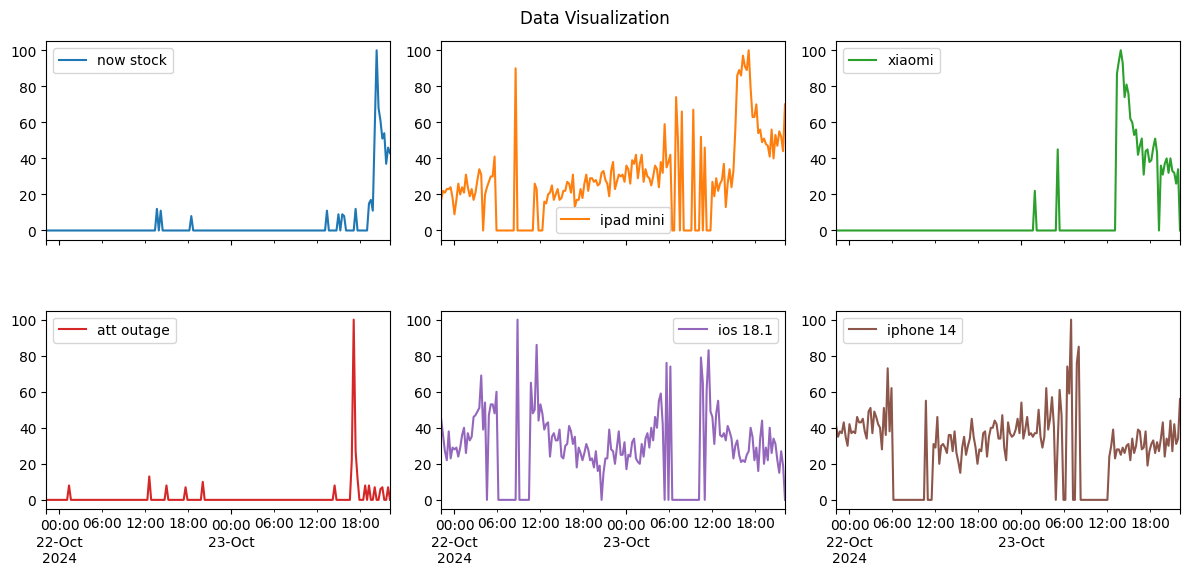

In [13]:
# Example: Get trending timeline for tech-related topics
trends_tech = list(filter(lambda item: 18 in item.topics, trends))
trend_keywords = [trend.keyword for trend in trends_tech]

df = tr.trending_now_showcase_timeline(
    keywords=trend_keywords[:9], 
    timeframe=BatchPeriod.Past48H
)

display(df.tail())
# Visualize trends
df.plot(
    subplots=True, 
    layout=(3, 3), 
    figsize=(12, 8), 
    title="Data Visualization", 
    legend=True
)
plt.tight_layout()

### 2.3 Related News Articles (`trending_now_news_by_ids`)

Retrieves news articles associated with trending topics using news tokens obtained from `trending_now`. Each token may contain multiple articles with details like title, source, URL, and publication time.

In [14]:
# Get top 3 news articles for the first trending topic
news = tr.trending_now_news_by_ids(trends_tech[0].news_tokens, max_news=3)

for news_item in news:
    print(news_item, '\n')

Title   : Better High-Growth AI Stock: ServiceNow vs. AppLovin
URL     : https://www.msn.com/en-us/money/topstocks/better-high-growth-ai-stock-servicenow-vs-applovin/ar-AA1sFKOi
Source  : MSN
Picture : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmNQKvMqPFxQ2shRBGM1gUBFE4oJzCXGSJ3TjXRCY6zRsoBEjsdDurS10TovQ
Time    : 2024-10-22 01:29:27 

Title   : Better High-Growth AI Stock: ServiceNow vs. AppLovin
URL     : https://www.fool.com/investing/2024/10/21/better-high-growth-ai-stock-servicenow-vs-applovin/
Source  : The Motley Fool
Picture : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTln-9FBDMjqxA0K7Drq_oS9lgipdNtZSTYc1dOXxHCds5CulnsfTLWVr5rgc0
Time    : 2024-10-22 01:00:00 

Title   : ServiceNow (NYSE:NOW) Beats Q3 Sales Targets But Contract Wins Slow Down
URL     : https://finance.yahoo.com/news/servicenow-nyse-now-beats-q3-202415808.html
Source  : Yahoo Finance
Picture : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuJLI9vMJpgWfkUYGMrteWG8Z8eoBGkv50FOp_Pfpj1

### 2.4 Alternative way for new trending keywords

In [15]:
trends_rss = tr.trending_now_by_rss(geo='US')
print(f'Got {len(trends_rss)} trend items')
print()
print(trends_rss[0])
print()
print(trends_rss[0].news[0])

Got 10 trend items

Keyword        : pelicans
Volume         : 500+
Started        : 2024-10-24 01:00:00
News           : 3 news

Title   : How to Watch Bulls vs. Pelicans: TV Channel and Live Stream Info for 
October 23
URL     : https://www.myjournalcourier.com/sports/watching-games/article/bulls-pelicans-nba-watch-info-10-23-2024-19852871.php
Source  : Jacksonville Journal-Courier


# 3. Deprecated trends API (but still works)

#### Daily Trends (deprecated)

In [16]:
trends = tr.daily_trends_deprecated()
print(f'Got {len(trends)} trend items')
print()
print(trends[0])
print()
print(trends[0].news[0])

Got 31 trend items

Keyword        : DeAndre Hopkins
Volume         : 200K+
Started        : 2024-10-23 15:15:06
News           : 7 news

Title   : Chiefs acquiring WR DeAndre Hopkins in trade with Titans
URL     : https://www.nfl.com/news/chiefs-acquiring-wr-deandre-hopkins-in-trade-with-titans
Source  : NFL.com
Picture : https://t1.gstatic.com/images?q=tbn:ANd9GcR1Ud7ytmUcePIfPKzjCwU_l8UKRTEF54Sexy0LG1JozV9gRJXhMS2Z2ifMNVRyGtP38O1a3IJK
Time    : 2024-10-23 21:15:06
Snippet : The Kansas City Chiefs made a splash play to add big-name receiver DeAndre Hopkins in a trade with the Tennessee Titans, NFL Network Insider Ian Rapoport&nbsp;...


#### Daily Trends by rss (deprecated)

In [17]:
trends_rss = tr.daily_trends_deprecated_by_rss()
print(f'Got {len(trends_rss)} trend items')
print()
print(trends_rss[0])
print()
print(trends_rss[0].news[0])

Got 20 trend items

Keyword        : DeAndre Hopkins
Volume         : 200,000+
Started        : 2024-10-23 15:00:00
Trend keywords : 1 keywords ()
News           : 2 news

Title   : Chiefs acquiring WR DeAndre Hopkins in trade with Titans
URL     : https://www.nfl.com/news/chiefs-acquiring-wr-deandre-hopkins-in-trade-with-titans
Source  : NFL.com
Snippet : The Kansas City Chiefs made a splash play to add big-name receiver DeAndre Hopkins in a trade with the Tennessee Titans, NFL Network Insider Ian Rapoport&amp;nbsp;...


#### Trending stories (deprecated)
Available category:
all: "all",  business: "b",  entertainment: "e",  health: "m",  sicTech: "t",  sports: "s",  top: "h"

In [19]:
trending_entities = tr.trending_stories(category='t', max_stories=20) # SciTech category
print(f'Got {len(trending_entities)} trend items')
print()
print(trending_entities[0])
print()
print(trending_entities[0].news[0])

Got 14 trend items

Keyword        : SpaceX, Space launch, Falcon 9, Blue Origin, USA-276
Started        : 2024-10-22 01:15:42
Trend keywords : 5 keywords (/m/047gm6k,/m/03lwz4,/m/03fkyw,/m/07v5bj,/g/11d...)
News           : 1 news

Title   : Launch Roundup: SpaceX approaches 400th orbital flight; Blue Origin, China, 
Japan launch missions
URL     : https://www.nasaspaceflight.com/2024/10/launch-roundup-102124/
Source  : NASASpaceFlight.com -
Time    : 2024-10-22 01:15:42
Snippet : This week will see a fourth flight of the Japanese H3 rocket carrying a 
communications satellite for the Japanese military and two launches...
